In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]], dtype = np.float64)

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [ ]:
y = wx + b -> min(MSE|w)
w1, w2, ..., w5

In [3]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X.T, y)
model.predict(X.T)
# 1. Не нормированный выход модели
# 2. MSE / MAE: (1 - 0)**2 / (1 - 0)

array([0.2617132 , 0.17509907, 1.02794228, 0.21840613, 0.53795688,
       0.31862798, 1.20396413, 0.05324898, 0.28336673, 0.91967463])

In [ ]:
np.dot(w, X) -> [-np.inf, np.inf]
sigmoid(np.dot(w, X)) -> [0, 1]
sigmoid(z) = 1 / (1 + np.exp(-z))

In [ ]:
p(X|Y=1) -> [0, 1]
p(X|Y=1) / p(X|Y=0) -> p(X|Y=1) / (1 - p(X|Y=1)) -> [0, np.inf]
p / (1-p) -> [0, np.inf]

np.log(p / (1 - p)) -> [-np.inf, np.inf]
np.dot(w, X) -> [-np.inf, np.inf]

In [15]:
p = 1-1e-10
np.log(p / (1 - p))                       

23.025850847100088

In [16]:
p = 0.8
np.log(p / (1 - p))

1.3862943611198908

In [ ]:
W*X = np.log(p / (1 - p))

In [ ]:
z = W*X
z = np.log(p / (1 - p))

In [ ]:
t = p / (1 - p) => t*(1-p) = p => t - t*p = p => t = p + t*p => t/p = 1 + t => p = t / (1 + t)

In [ ]:
p = t / (1 + t)

In [ ]:
z = np.log(t) => t = e**z => e**(W*X)

In [ ]:
p = t / (1 + t) => p = e**z / (1 + e**z) => p = 1 / (1/e**z + 1) => p = 1 / (1 + e**(-z)) => p = 1/(1 + e**(-W*X))

In [ ]:
p = 1/(1 + e**(-W*X))

In [19]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [ ]:
X_st = X.copy()
X_st[2, :] = calc_std_feat(X[2, :])

In [ ]:
X_st

In [20]:
def calc_logloss(y, y_pred):
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    return err

<ipython-input-18-f080e5c84ef7>:2: RuntimeWarning: divide by zero encountered in log
  y_ = np.log(x_)


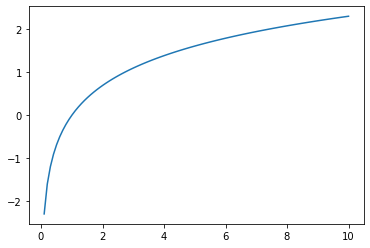

In [18]:
x_ = np.linspace(0, 10, 100)
y_ = np.log(x_)

plt.plot(x_, y_)

In [24]:
# Пример применения
y1 = np.array([1, 0])
y_pred1 = np.array([0.1, 0.1])
calc_logloss(y1, y_pred1)

1.203972804325936

In [25]:
y_pred = 0.68

In [26]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [6]:
z = np.linspace(-100, 100, 101)
z

array([-100.,  -98.,  -96.,  -94.,  -92.,  -90.,  -88.,  -86.,  -84.,
        -82.,  -80.,  -78.,  -76.,  -74.,  -72.,  -70.,  -68.,  -66.,
        -64.,  -62.,  -60.,  -58.,  -56.,  -54.,  -52.,  -50.,  -48.,
        -46.,  -44.,  -42.,  -40.,  -38.,  -36.,  -34.,  -32.,  -30.,
        -28.,  -26.,  -24.,  -22.,  -20.,  -18.,  -16.,  -14.,  -12.,
        -10.,   -8.,   -6.,   -4.,   -2.,    0.,    2.,    4.,    6.,
          8.,   10.,   12.,   14.,   16.,   18.,   20.,   22.,   24.,
         26.,   28.,   30.,   32.,   34.,   36.,   38.,   40.,   42.,
         44.,   46.,   48.,   50.,   52.,   54.,   56.,   58.,   60.,
         62.,   64.,   66.,   68.,   70.,   72.,   74.,   76.,   78.,
         80.,   82.,   84.,   86.,   88.,   90.,   92.,   94.,   96.,
         98.,  100.])

In [7]:
probabilities = sigmoid(z)

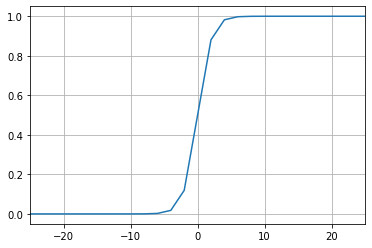

In [14]:
plt.plot(z, probabilities)
plt.xlim(-25, 25)
plt.grid()

In [ ]:
### Logistic Regression

In [39]:
def eval_model(X, y, iterations, alpha=1e-4, metric: callable = None):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
    if i % (iterations / 10) == 0:
        print(i, W, err)
    return W

In [40]:
W = eval_model(X, y, iterations=5000, alpha=1e-5)

5000 [ 0.49314177 -0.14151841 -0.00414786  1.52547952] 0.8471318040263481


<ipython-input-20-7d5907c1794a>:2: RuntimeWarning: divide by zero encountered in log
  err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
<ipython-input-20-7d5907c1794a>:2: RuntimeWarning: invalid value encountered in multiply
  err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))


In [34]:
z = np.dot(W, X)
y_pred = sigmoid(z)

from sklearn.metrics import roc_auc_score
roc_auc_score(y_true=y, y_score=y_pred)

0.6

In [41]:
from sklearn.linear_model import LogisticRegression as LR

In [42]:
# построение ROC-кривой

y_true = [0, 0, 0, 1, 1, 1, 0, 0, 0, 0]
y_pred = [0.1, 0.7, 0.85, 0, 0.9, 0.67, 0.15, 0.25, 0.6, 0.4]

In [52]:
import pandas as pd

df = pd.DataFrame({
    "y_true": y_true,
    "y_pred": y_pred
})

df = df.sort_values(by="y_pred", ascending=False)
df["y_pred"] = 1 - df["y_pred"]
df

,y_true,y_pred
4,1,0.10
2,0,0.15
1,0,0.30
5,1,0.33
8,0,0.40
9,0,0.60
7,0,0.75
6,0,0.85
0,0,0.90
3,1,1.00


In [53]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

(0.0, 1.0)

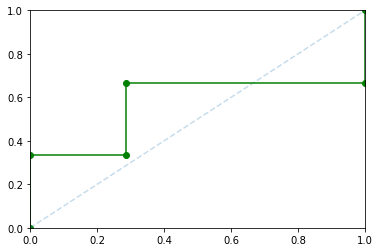

In [54]:
fpr, tpr, _ = roc_curve(y_true, y_pred)
plt.plot([0, 1], [0, 1], label="Random", linestyle="--", alpha=0.25)
plt.plot(fpr, tpr, color="green")
plt.scatter(fpr, tpr, color="green")
plt.xlim(0,1)
plt.ylim(0,1)

In [55]:
roc_auc_score(y_true, y_pred)

0.5714285714285714

In [ ]:
import numpy as np
np.random.randint(X.shape[1])

In [ ]:
X.shape

In [57]:
1/3 * 2/7 + 2/3*5/7

0.5714285714285714